In [16]:
!pip install clickhouse-connect ydata-profiling missingno
!pip install xgboost lightgbm catboost
!pip install boto3 cachetools

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 822.6 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 4.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [1]:
import os

import clickhouse_connect
import missingno as mono
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from common import *

In [16]:
client = clickhouse_connect.get_client(host="localhost", user="default", password="")

In [3]:
df = client.query_df(f"SELECT coords, {','.join(COLUMNS)} FROM sales_info")
with pd.option_context('display.max_columns', 80, 'display.max_rows', 50):
    display(df.head(10))

,coords,sale_id,timestamp,district,num_room,price,price_currency,apartment_type,building_type,decorating,full_sq,life_sq,kitch_sq,height,floor,max_floor,build_year,subway_line,subway_name,subway_km,railroad_id,railroad_routes,railroad_km,sadovoe_km,trr_km,mkad_km,nuclear_reactor_km,food_count_500_price_500,food_count_500_price_1000,food_count_500_price_1500,food_count_500_price_2500,food_count_500_price_4000,food_count_500_price_more,food_count_500,sport_count_500,food_count_1000_price_500,food_count_1000_price_1000,food_count_1000_price_1500,food_count_1000_price_2500,food_count_1000_price_4000,food_count_1000_price_more,food_count_1000,sport_count_1000,food_count_1500_price_500,food_count_1500_price_1000,food_count_1500_price_1500,food_count_1500_price_2500,food_count_1500_price_4000,food_count_1500_price_more,food_count_1500,sport_count_1500,food_count_2000_price_500,food_count_2000_price_1000,food_count_2000_price_1500,food_count_2000_price_2500,food_count_2000_price_4000,food_count_2000_price_more,food_count_2000,sport_count_2000,food_count_3000_price_500,food_count_3000_price_1000,food_count_3000_price_1500,food_count_3000_price_2500,food_count_3000_price_4000,food_count_3000_price_more,food_count_3000,sport_count_3000,food_count_5000_price_500,food_count_5000_price_1000,food_count_5000_price_1500,food_count_5000_price_2500,food_count_5000_price_4000,food_count_5000_price_more,food_count_5000,sport_count_5000
0,"{'latitude': 55.77228091175091, 'longitude': 3...",286955472,2023-06-03 07:38:32+03:00,Пресненский район,3,350542720,b'RUB',Новостройка,Монолитно-кирпичный,Неизвестно,149.0,0.0,0.0,0.0,3,5,2023,b'12',Бунинская аллея,26.374001,b'4504282901129554',"[b'4504205217760835', b'4504205591690671']",118.2939,1.265765,0.3468,6.505864,0.103982,1,1,1,2,2,2,3,0,1,2,2,4,4,5,8,3,4,6,7,9,11,12,21,10,10,15,19,24,26,28,41,29,27,42,51,64,68,71,113,73,122,188,218,244,253,258,376,165
1,"{'latitude': 55.77228091175091, 'longitude': 3...",288061701,2023-06-03 07:38:56+03:00,Пресненский район,3,115000000,b'RUB',Вторичка,Монолитный,Дизайнерский,0.0,0.0,0.0,0.0,0,0,2017,b'12',Бунинская аллея,26.374001,b'4504282901129554',"[b'4504205217760835', b'4504205591690671']",118.2939,1.265765,0.3468,6.505864,0.103982,1,1,1,2,2,2,3,0,1,2,2,4,4,5,8,3,4,6,7,9,11,12,21,10,10,15,19,24,26,28,41,29,27,42,51,64,68,71,113,73,122,188,218,244,253,258,376,165
2,"{'latitude': 55.77228091175091, 'longitude': 3...",286955472,2023-06-03 07:38:57+03:00,Пресненский район,3,350542720,b'RUB',Новостройка,Монолитно-кирпичный,Неизвестно,149.0,0.0,0.0,0.0,3,5,2023,b'12',Бунинская аллея,26.374001,b'4504282901129554',"[b'4504205217760835', b'4504205591690671']",118.2939,1.265765,0.3468,6.505864,0.103982,1,1,1,2,2,2,3,0,1,2,2,4,4,5,8,3,4,6,7,9,11,12,21,10,10,15,19,24,26,28,41,29,27,42,51,64,68,71,113,73,122,188,218,244,253,258,376,165
3,"{'latitude': 55.77228091175091, 'longitude': 3...",287781519,2023-06-03 07:39:01+03:00,Пресненский район,2,47181037,b'RUB',Новостройка Апартаменты,Монолитный,Предчистовая,72.0,0.0,0.0,3.0,6,10,2023,b'12',Бунинская аллея,26.374001,b'4504282901129554',"[b'4504205217760835', b'4504205591690671']",118.2939,1.265765,0.3468,6.505864,0.103982,1,1,1,2,2,2,3,0,1,2,2,4,4,5,8,3,4,6,7,9,11,12,21,10,10,15,19,24,26,28,41,29,27,42,51,64,68,71,113,73,122,188,218,244,253,258,376,165
4,"{'latitude': 55.77228091175091, 'longitude': 3...",287781581,2023-06-03 07:39:01+03:00,Пресненский район,1,42110754,b'RUB',Новостройка Апартаменты,Монолитный,Предчистовая,65.0,0.0,0.0,3.0,5,16,2023,b'12',Бунинская аллея,26.374001,b'4504282901129554',"[b'4504205217760835', b'4504205591690671']",118.2939,1.265765,0.3468,6.505864,0.103982,1,1,1,2,2,2,3,0,1,2,2,4,4,5,8,3,4,6,7,9,11,12,21,10,10,15,19,24,26,28,41,29,27,42,51,64,68,71,113,73,122,188,218,244,253,258,376,165
5,"{'latitude': 55.77228091175091, 'longitude': 3...",281896679,2023-06-03 07:39:02+03:00,Пресненский район,3,172120000,b'RUB',Новостройка Апартаменты,Монолитно-кирпичный,Без отделки,88.0,56.0,0.0,3.0,2,5,2024,b'12'

In [4]:
CATEGORICAL_FEATURES = ['district', 'apartment_type', 'building_type', 'decorating', 'parking', 'subway_line', 'subway_name', 'railroad_id']

def preprocess_data(df):
    df.num_room = df.num_room.map(lambda x: x if re.match(r"\d+", x) else 0).astype(np.uint8)
    df.apartment_type = df.apartment_type.str.replace(r"\s*Апартаменты", "", regex=True)
    df.decorating = df.decorating.replace(["Описание квартиры", "Неизвестно", "С отделкой"], "")
    df.replace(r"^\s*$", pd.NA, regex=True, inplace=True)
    df.price = df.price.astype('Int32').replace(0, None)
    df.max_floor = df.max_floor.astype('UInt8').replace(0, None)
    nullable_real_features = ['full_sq', 'life_sq', 'kitch_sq', 'height']
    df[nullable_real_features] = df[nullable_real_features].replace(0.0, np.nan)
    df[CATEGORICAL_FEATURES] = df[CATEGORICAL_FEATURES].astype('category')
    assert [b'RUB'] == df.price_currency.unique()
    df.drop(columns=['price_currency', 'railroad_routes'], inplace=True)
    return df

df = preprocess_data(df)

In [5]:
df[df.decorating == "Описание квартиры"]

,coords,sale_id,timestamp,district,num_room,price,apartment_type,building_type,decorating,full_sq,...,food_count_3000,sport_count_3000,food_count_5000_price_500,food_count_5000_price_1000,food_count_5000_price_1500,food_count_5000_price_2500,food_count_5000_price_4000,food_count_5000_price_more,food_count_5000,sport_count_5000


In [6]:
from ydata_profiling import ProfileReport
ProfileReport(df, minimal=True).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [111]:
with pd.option_context('display.max_rows', 100):
    display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7737 entries, 0 to 7736
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype                        
---  ------                      --------------  -----                        
 0   coords                      7737 non-null   object                       
 1   sale_id                     7737 non-null   uint32                       
 2   timestamp                   7737 non-null   datetime64[ns, Europe/Moscow]
 3   district                    7737 non-null   category                     
 4   num_room                    7737 non-null   uint8                        
 5   price                       7737 non-null   Int32                        
 6   apartment_type              7220 non-null   category                     
 7   building_type               7217 non-null   category                     
 8   decorating                  7737 non-null   category                     
 9   parking            

None

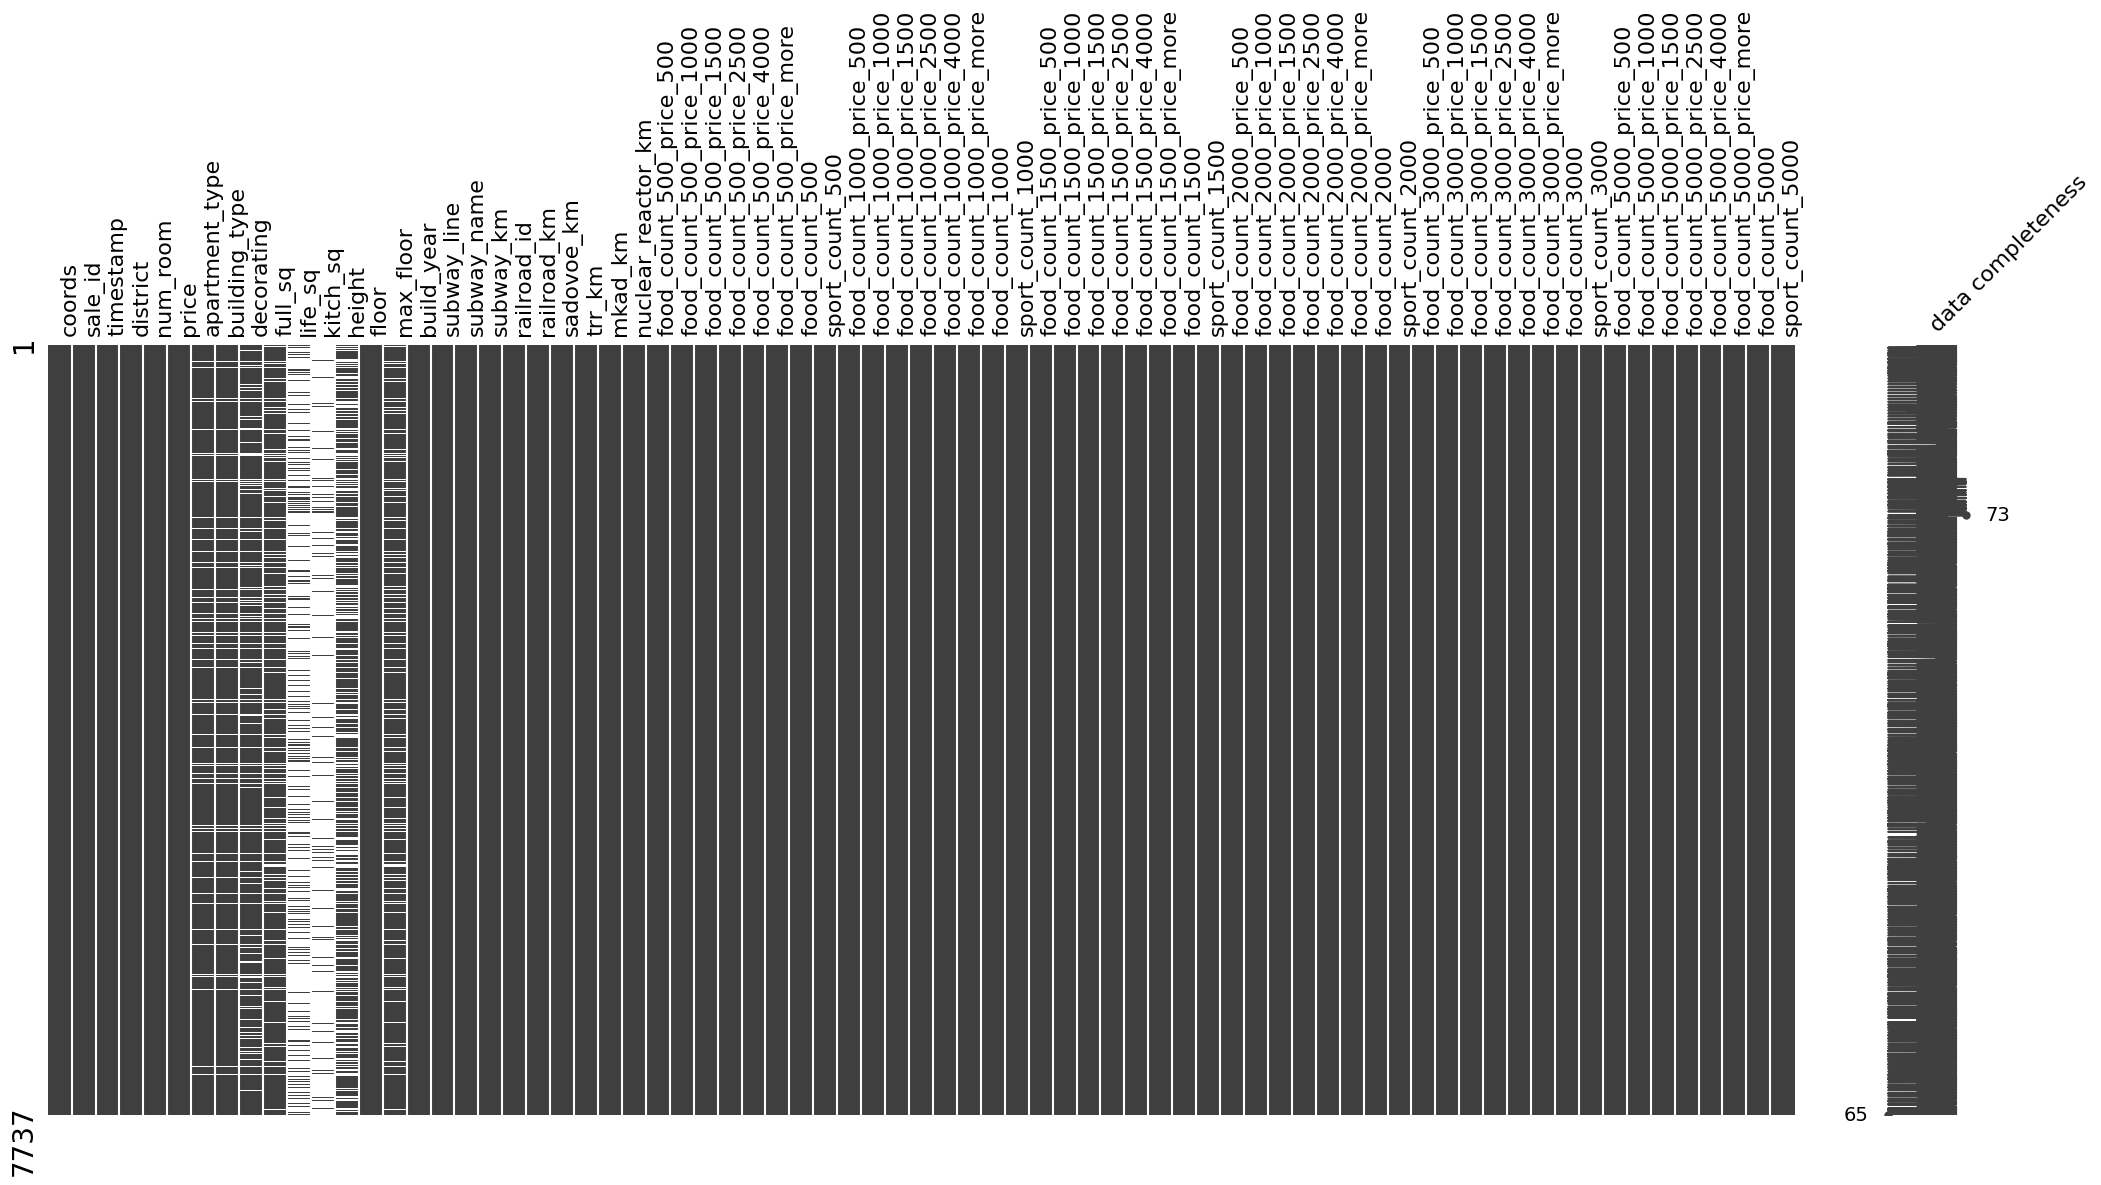

In [7]:
%matplotlib inline
mat = mono.matrix(df, labels=True)
mat.axes.tick_params(labelrotation=90)

In [8]:
def filter_data(df):
    df = df.drop(columns=['life_sq', 'kitch_sq'])
    df = df[~df.isna().any(axis=1)]
    return df
df = filter_data(df)
features_df = df.drop(['coords', 'sale_id', 'timestamp'], axis=1)

In [10]:
from catboost import CatBoostRegressor
params = dict(loss_function='RMSE', depth=5, eval_metric='MSLE', task_type='CPU')
model = CatBoostRegressor(**params, cat_features=CATEGORICAL_FEATURES)
model.fit(features_df.drop(columns=['price']), features_df.price)

Learning rate set to 0.052986
0:	learn: 0.4498083	total: 3.51ms	remaining: 3.51s
1:	learn: 0.4148534	total: 6.53ms	remaining: 3.26s
2:	learn: 0.3841488	total: 8.33ms	remaining: 2.77s
3:	learn: 0.3548301	total: 9.46ms	remaining: 2.35s
4:	learn: 0.3284593	total: 10.9ms	remaining: 2.16s
5:	learn: 0.3035645	total: 12.4ms	remaining: 2.05s
6:	learn: 0.2809820	total: 16ms	remaining: 2.27s
7:	learn: 0.2597214	total: 18ms	remaining: 2.23s
8:	learn: 0.2403640	total: 19.4ms	remaining: 2.13s
9:	learn: 0.2221557	total: 20.8ms	remaining: 2.06s
10:	learn: 0.2054155	total: 22ms	remaining: 1.97s
11:	learn: 0.1896327	total: 23.6ms	remaining: 1.94s
12:	learn: 0.1759099	total: 24.8ms	remaining: 1.88s
13:	learn: 0.1632289	total: 26.1ms	remaining: 1.84s
14:	learn: 0.1504977	total: 27.5ms	remaining: 1.81s
15:	learn: 0.1396591	total: 28.9ms	remaining: 1.78s
16:	learn: 0.1286637	total: 30.5ms	remaining: 1.76s
17:	learn: 0.1184735	total: 32.1ms	remaining: 1.75s
18:	learn: 0.1091017	total: 33.7ms	remaining: 1.74

In [8]:
y = model.predict(features_df.drop(columns=['price']).iloc[0].to_frame().T)
y

array([47180719.52206954])

In [11]:
MODEL_REGISTRY['price_predictor'] = model

In [10]:
feature_importances = dict(zip(model.feature_names_, model.feature_importances_))

In [11]:
def get_ranking_features(sample, df, feature_importances):
    features = {}
    features['distance'] = np.sqrt(np.sum(np.power(np.array([df.longitude-sample.longitude, df.latitude-sample.latitude]), 2)))
    quantitative_features = ('num_room', 'price', 'full_sq', 'height', 'floor', 'build_year')
    for f in quantitative_features:
        features[f'{f}_div'] = feature_importances[f] * (-(df[f] - sample[f]).abs()).apply(np.exp)
    unordered_qualitative_features = ('district', 'apartment_type', 'building_type', 'decorating', 'parking')
    for f in unordered_qualitative_features:
        features[f'{f}_is_different'] = feature_importances[f] * (df[f] != sample[f])
    return pd.DataFrame(features)